In [1]:
import momepy as mm
import geopandas as gpd
import numpy as np

In [2]:
buildings = gpd.read_file(r"I:\BH_DataBase\Amsterdam\Amsterdam_building.gpkg")

In [3]:
buildings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 169193 entries, 0 to 169192
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      169193 non-null  object  
 1   height                  169193 non-null  float64 
 2   age                     169193 non-null  int64   
 3   type                    0 non-null       float64 
 4   id_source               169193 non-null  object  
 5   type_source             0 non-null       float64 
 6   building_ndsm_mean      169193 non-null  float64 
 7   building_ndsm_stdev     169193 non-null  float64 
 8   building_ndsm_min       169193 non-null  float64 
 9   building_ndsm_max       169193 non-null  float64 
 10  building_ndsm_s_mean    169193 non-null  float64 
 11  building_ndsm_s_stdev   169193 non-null  float64 
 12  building_ndsm_s_min     169193 non-null  float64 
 13  building_ndsm_s_max     169193 non-null  float64 
 

# Raw evaluation

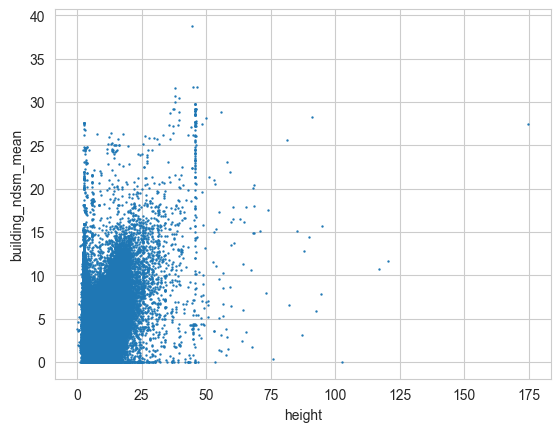

In [4]:
import matplotlib.pyplot as plt
plt.scatter(buildings['height'], buildings['building_ndsm_mean'], s=0.5)
plt.xlabel('height')
plt.ylabel('building_ndsm_mean')
plt.show()

In [5]:
# rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(buildings['height'], buildings['building_ndsm_mean']))
print(rmse)

7.073085144382162


In [6]:
# r2
from sklearn.metrics import r2_score
r2 = r2_score(buildings['height'], buildings['building_ndsm_mean'])
print(r2)

-0.5753404023071349


# Process

In [7]:
copy = buildings.copy()

In [8]:
copy = copy.explode().reset_index(drop=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_77044\360806111.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  copy = copy.explode().reset_index(drop=True)


In [9]:
copy['id'] = copy.index

In [10]:
# drop columns id_source,type_source
copy.drop(columns=['id_source', 'type_source'], inplace=True)
copy

,id,height,age,type,building_ndsm_mean,building_ndsm_stdev,building_ndsm_min,building_ndsm_max,building_ndsm_s_mean,building_ndsm_s_stdev,building_ndsm_s_min,building_ndsm_s_max,building_ndsm_sm_mean,building_ndsm_sm_stdev,building_ndsm_sm_min,building_ndsm_sm_max,geometry
0,0,8.810910,1923,NaN,3.440000,0.000000e+00,3.44,3.44,4.692500,0.000000,4.692500,4.692500,6.307500,0.000000,6.307500,6.307500,"POLYGON ((3973644.962 3268203.243, 3973644.962..."
1,1,7.467500,1950,NaN,2.885033,6.638501e-01,2.80,3.82,2.179633,0.992521,2.052500,3.577500,0.999657,1.480646,0.810000,3.085000,"POLYGON ((3976770.186 3265556.206, 3976770.185..."
2,2,8.063870,1931,NaN,2.022737,1.061408e+00,0.65,2.63,1.856984,1.381707,0.070000,2.647500,1.802650,1.948596,-0.717500,2.917500,"POLYGON ((3975898.760 3265769.202, 3975898.761..."
3,3,13.437600,1880,NaN,7.843150,2.134233e+00,4.81,7.87,9.277631,3.590173,4.095000,9.377500,11.939730,6.166752,3.085000,12.112499,"POLYGON ((3973594.069 3262404.139, 3973594.069..."
4,4,5.591080,1988,NaN,2.415752,5.236602e-01,1.75,2.76,2.667560,0.728639,1.730000,3.215000,3.238397,1.197805,1.695000,4.172500,"POLYGON ((3973893.366 3267633.403, 3973893.367..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169188,169188,14.407900,1921,NaN,4.065536,1.535494e+00,2.19,5.16,4.776336,2.270929,2.002500,6.395000,5.787883,3.264865,1.800000,8.115000,"POLYGON ((3971342.203 3261783.586, 3971342.203..."
169189,169189,16.013300,1913,NaN,7.733016,8.452697e-01,7.12,9.21,7.760271,1.718178,6.567500,10.684999,8.041046,2.735684,6.474999,13.000000,"POLYGON ((3971113.150 3261436.177, 3971113.149..."
169190,169190,2.777260,1981,NaN,6.280000,8.881784e-16,6.28,6.28,8.330001,0.000000,8.330001,8.330001,11.612500,0.000000,11.612500,11.612500,"POLYGON ((3967075.939 3263069.039, 3967075.938..."
169191,169191,14.290900,1965,NaN,3.316032,1.449981e-01,3.16,3.49,3.422473,0.467463,2.915000,4.000000,3.673144,1.126742,2.420000,5.062500,"POLYGON ((3966574.704 3263125.618, 3966574.704..."


## building merics

In [11]:
copy['area'] = mm.Area(copy).series
copy['perimeter'] = copy.length
copy['fractal'] = mm.FractalDimension(copy, 'area', 'perimeter').series
copy['compactness'] = mm.SquareCompactness(copy, 'area', 'perimeter').series
copy['elongation'] = mm.Elongation(copy).series
copy['ccd_stdev'] = mm.CentroidCorners(copy).std
copy['ccd_means'] = mm.CentroidCorners(copy).mean
copy['longest_axis'] = mm.LongestAxisLength(copy).series
copy['convexity'] = mm.Convexity(copy).series
copy['shape_index'] = mm.ShapeIndex(copy,longest_axis='elongation').series
copy['orientation'] = mm.Orientation(copy).series
copy['corners'] = mm.Corners(copy).series

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

In [12]:
import libpysal
dist200 = libpysal.weights.DistanceBand.from_dataframe(copy, 200,
                                                       ids='id')
dist100 = libpysal.weights.DistanceBand.from_dataframe(copy, 100,
                                                       ids='id')
dist50 = libpysal.weights.DistanceBand.from_dataframe(copy, 50,
                                                       ids='id')

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 144 disconnected components.
 There are 29 islands with ids: 13778, 15546, 18776, 27796, 41154, 46489, 53348, 59683, 61001, 64672, 67282, 68226, 69400, 75029, 93917, 95654, 101720, 104473, 104563, 106126, 122909, 125211, 127557, 130179, 133536, 138956, 142527, 150964, 169173.
  warnings.warn(message)
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 812 disconnected components.
 There are 332 islands with ids: 877, 887, 1120, 1670, 3451, 4046, 4314, 5218, 6166, 6477, 7559, 7707, 8884, 9561, 9897, 9914, 10462, 11231, 11346, 12664, 13246, 13269, 13778, 14225, 14929, 15038, 15546, 17372, 18684, 18776, 18816, 18869, 19481, 19810, 20498, 21065, 21264, 21343, 21381, 21453, 22828, 22929, 23070, 23525, 24200, 24990, 25196, 263

In [13]:
copy['neighbours_200'] = mm.Neighbors(copy, dist200,'id').series
copy['neighbours_100'] = mm.Neighbors(copy, dist100,'id').series
copy['neighbours_50'] = mm.Neighbors(copy, dist50,'id').series
copy['adjacency_200'] = mm.BuildingAdjacency(copy, dist200,'id').series
copy['adjacency_100'] = mm.BuildingAdjacency(copy, dist100,'id').series
copy['adjacency_50'] = mm.BuildingAdjacency(copy, dist50,'id').series

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

Calculating spatial weights...
Spatial weights ready...


Calculating adjacency:   0%|          | 0/169193 [00:00<?, ?it/s]

Calculating spatial weights...
Spatial weights ready...


Calculating adjacency:   0%|          | 0/169193 [00:00<?, ?it/s]

Calculating spatial weights...
Spatial weights ready...


Calculating adjacency:   0%|          | 0/169193 [00:00<?, ?it/s]

In [14]:
copy['area_100'] = mm.AverageCharacter(copy,'area',dist100,'id').mean
copy['perimeter_100'] = mm.AverageCharacter(copy,'perimeter',dist100,'id').mean
copy['shape_index_100'] = mm.AverageCharacter(copy,'shape_index',dist100,'id').mean
copy['area_200'] = mm.AverageCharacter(copy,'area',dist200,'id').mean
copy['perimeter_200'] = mm.AverageCharacter(copy,'perimeter',dist200,'id').mean
copy['shape_index_200'] = mm.AverageCharacter(copy,'shape_index',dist200,'id').mean
copy['area_50'] = mm.AverageCharacter(copy,'area',dist50,'id').mean
copy['perimeter_50'] = mm.AverageCharacter(copy,'perimeter',dist50,'id').mean
copy['shape_index_50'] = mm.AverageCharacter(copy,'shape_index',dist50,'id').mean

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

In [16]:
copy['building_ndsm_mean_50'] = mm.AverageCharacter(copy,'building_ndsm_mean',dist50,'id').mean
copy['building_ndsm_mean_100'] = mm.AverageCharacter(copy,'building_ndsm_mean',dist100,'id').mean
copy['building_ndsm_mean_200'] = mm.AverageCharacter(copy,'building_ndsm_mean',dist200,'id').mean
copy['building_ndsm_min_50'] = mm.AverageCharacter(copy,'building_ndsm_min',dist50,'id').mean
copy['building_ndsm_min_100'] = mm.AverageCharacter(copy,'building_ndsm_min',dist100,'id').mean
copy['building_ndsm_min_200'] = mm.AverageCharacter(copy,'building_ndsm_min',dist200,'id').mean
copy['building_ndsm_max_50'] = mm.AverageCharacter(copy,'building_ndsm_max',dist50,'id').mean
copy['building_ndsm_max_100'] = mm.AverageCharacter(copy,'building_ndsm_max',dist100,'id').mean
copy['building_ndsm_max_200'] = mm.AverageCharacter(copy,'building_ndsm_max',dist200,'id').mean

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

  0%|          | 0/169193 [00:00<?, ?it/s]

# Train model

In [17]:
# rf model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
copy.fillna(0, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_77044\3847152646.py:1: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  copy.fillna(0, inplace=True)


In [38]:
#  train test split
X = copy.drop(columns=['height', 'geometry', 'id','type','age'])
y = copy['height']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# train model
rf = RandomForestRegressor(n_estimators=500, random_state=42,n_jobs=6)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=6, random_state=42)

In [22]:
# predict
y_pred = rf.predict(X_test)

In [23]:
# rmse
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

2.1997437521407712


In [24]:
# r2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8472330449061649


In [25]:
len(y_test)

50758

In [26]:
# feature importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

In [27]:
indices = np.argsort(importances)[::-1]

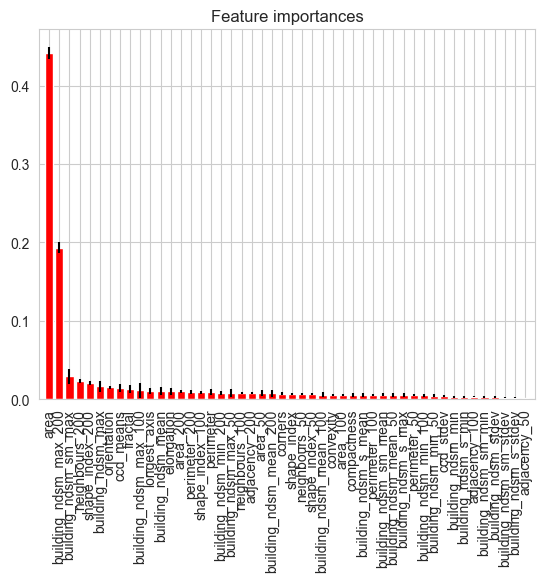

In [28]:
# plot feature importance
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [29]:
y_pred

array([ 2.32559114, 16.76285352,  8.141322  , ...,  7.6653661 ,
        6.3866594 , 16.90557404])

(array([3.400e+01, 3.570e+02, 8.942e+03, 2.481e+03, 7.360e+02, 4.300e+02,
        2.880e+02, 3.030e+02, 2.780e+02, 8.180e+02, 1.679e+03, 1.549e+03,
        1.765e+03, 2.516e+03, 3.106e+03, 2.344e+03, 1.206e+03, 1.082e+03,
        7.720e+02, 6.430e+02, 6.650e+02, 6.440e+02, 6.690e+02, 7.560e+02,
        8.770e+02, 1.138e+03, 1.330e+03, 1.461e+03, 1.762e+03, 2.118e+03,
        2.244e+03, 2.022e+03, 1.367e+03, 8.920e+02, 4.580e+02, 2.320e+02,
        1.350e+02, 9.500e+01, 6.500e+01, 4.200e+01, 3.600e+01, 3.300e+01,
        2.600e+01, 2.400e+01, 2.100e+01, 1.800e+01, 2.600e+01, 1.300e+01,
        1.400e+01, 2.100e+01, 9.000e+00, 1.500e+01, 1.500e+01, 1.300e+01,
        5.000e+00, 8.000e+00, 1.000e+01, 4.000e+00, 7.000e+00, 1.300e+01,
        9.000e+00, 7.000e+00, 3.000e+00, 4.000e+00, 8.000e+00, 5.000e+00,
        5.000e+00, 6.000e+00, 4.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

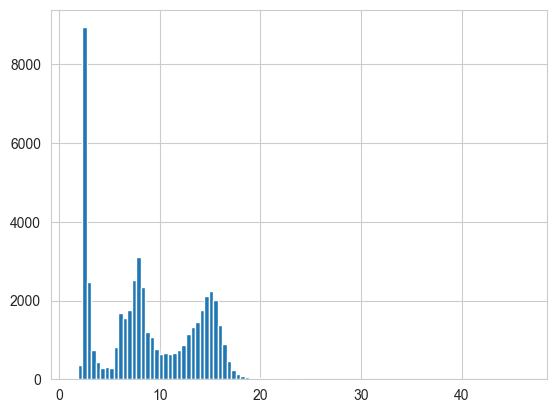

In [30]:
# hist 
plt.hist(y_pred, bins=100)

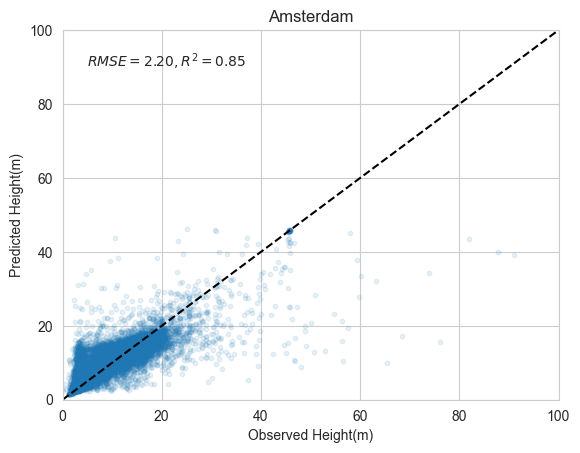

In [43]:
# scatter plot
plt.scatter(y_test, y_pred, s=10, alpha=0.1)
plt.xlabel('Observed Height(m)')
plt.ylabel('Predicted Height(m)')
plt.title('Amsterdam')
plt.text(5, 90, r'$RMSE=%.2f, R^2=%.2f$' % (rmse, r2))
plt.xlim(0, 100)
plt.ylim(0, 100)
# 1:1 line
plt.plot([0, 100], [0, 100], '--k')
plt.show()

In [44]:
len(y_test)

50758

In [45]:
# y_test y_pred export to csv
import pandas as pd
y_test = pd.DataFrame(y_test)
y_test['y_pred'] = y_pred
y_test.to_csv(r'I:\BH_DataBase\Amsterdam\Scatter.csv')

In [1]:
# read csv
import pandas as pd
scatter = pd.read_csv(r'I:\BH_DataBase\Amsterdam\Scatter.csv')

In [5]:
scatter

,Unnamed: 0,height,y_pred
0,145928,2.303466,2.325591
1,14928,14.380600,16.762854
2,5860,8.057780,8.141322
3,49517,16.676900,14.590377
4,127355,2.610501,2.615112
...,...,...,...
50753,148520,2.480040,2.511444
50754,62418,11.197520,11.560751
50755,127570,7.632850,7.665366
50756,86459,6.274180,6.386659


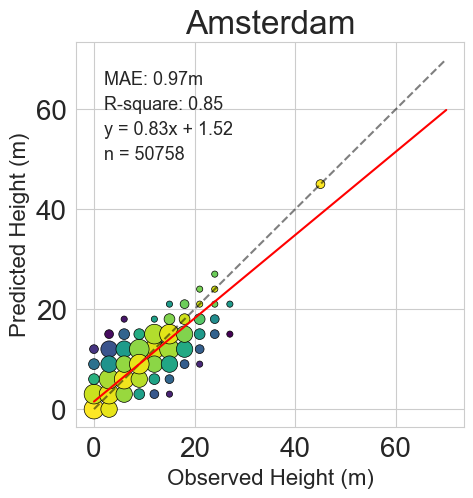

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
#font size
plt.rcParams.update({'font.size': 20,'axes.labelsize': 16})
# arial font
plt.rcParams['font.family'] = 'Arial'
result_gdf = scatter.copy()
result_gdf['pred_reclass'] = result_gdf['y_pred'].apply(lambda x: int(x/3)*3)
result_gdf['building_height_ref_reclass'] = result_gdf['height'].apply(lambda x: int(x/3)*3)
result_gdf['reclass'] = result_gdf['pred_reclass'].astype(str) + '_' + result_gdf['building_height_ref_reclass'].astype(str)
result_gdf['residual'] = result_gdf['y_pred'] - result_gdf['height']
result_gdf['residual_abs'] = result_gdf['residual'].abs()
stat_df = result_gdf.groupby(['reclass'])['residual_abs'].agg(['mean','count'])
stat_df.reset_index(inplace=True)
stat_df = stat_df[stat_df['count']>10]
stat_df['pred'] = stat_df['reclass'].apply(lambda x: x.split('_')[0]).astype(int)
stat_df['ref'] = stat_df['reclass'].apply(lambda x: x.split('_')[1]).astype(int)
# reclass the count to 5 classes with equal interval
stat_df['count_reclass'] = pd.qcut(stat_df['count'],5,labels=[1,2,3,7,10])
stat_df['count_reclass'] = stat_df['count_reclass'].astype(int)
# iterate the grid and plot
plt.scatter(stat_df['ref'],stat_df['pred'],c=stat_df['mean'],s=stat_df['count_reclass']*20,cmap='viridis_r',edgecolors='black',linewidths=0.5)
plt.xlabel('Observed Height (m)',fontsize=16)
plt.ylabel('Predicted Height (m)',fontsize=16)
plt.title('Amsterdam')
# line 
plt.plot([0,70],[0,70],color='black',linestyle='--',alpha=0.5)
# label rmse,r2,fitted formula with 1st order and the coefficient of determination, and the number of samples
mae = (mean_absolute_error(result_gdf['height'], result_gdf['y_pred']))
r2 = r2_score(result_gdf['height'], result_gdf['y_pred'])
fitted_line = np.polyfit(result_gdf['height'], result_gdf['y_pred'], 1)
n = len(result_gdf)
plt.text(2,65,'MAE: {0:.2f}m'.format(mae),fontsize=13)
plt.text(2,60,'R-square: {0:.2f}'.format(r2),fontsize=13)
plt.text(2,55,'y = {0:.2f}x + {1:.2f}'.format(fitted_line[0],fitted_line[1]),fontsize=13)
plt.text(2,50,'n = {0}'.format(n),fontsize=13)
#plot the 1st order fitted line and the coefficient of determination
plt.plot([0,70],[fitted_line[1],fitted_line[0]*70+fitted_line[1]],color='red')
plt.savefig(r'I:\BH_DataBase\Amsterdam\Scatter.png',dpi=300,bbox_inches='tight')